In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler

In [2]:
# Show all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import the Dataset

In [3]:
# Read the CSV file into a DataFrame
nasa_data = pd.read_csv('./datasets/nasa.csv')
nasa_data.head()


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,933.308089,1/1/1995,7.889470e+11,6.115834,22017.00380,13680.50994,0.419483,163.178711,62753692.0,38993336.0,Earth,17,6/4/2017 8:36,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1/1/1995,7.889470e+11,18.113985,65210.34609,40519.17311,0.383014,148.992630,57298148.0,35603420.0,Earth,21,6/4/2017 8:32,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,8/1/1995,7.895520e+11,7.590711,27326.56018,16979.66180,0.050956,19.821890,7622911.5,4736657.5,Earth,22,6/4/2017 9:20,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,15/1/1995,7.901570e+11,11.173875,40225.94819,24994.83986,0.285322,110.990387,42683616.0,26522368.0,Earth,7,6/4/2017 9:15,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,933.308089,15/1/1995,7.901570e+11,9.840831,35426.99179,22012.95498,0.407832,158.646713,61010824.0,37910368.0,Earth,25,6/4/2017 8:57,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True


In [4]:
nasa_data.describe(include="all")

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4.687000e+03,4687,4687.000000,4687,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687,4687
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22/7/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Earth,NaN,6/4/2017 9:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J2000,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4687,NaN,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4687,3932
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,1501.013521,NaN,1.179881e+12,13.970811,50294.919829,31251.307268,0.256778,99.886706,3.841347e+07,2.386902e+07,NaN,28.300619,NaN,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242,NaN,NaN
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,2711.257465,NaN,1.981540e+11,7.293223,26255.601377,16314.209644,0.145798,56.715493,2.181110e+07,1.355279e+07,NaN,38.299668,NaN,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627,NaN,NaN
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,NaN,7.889470e+11,0.335504,1207.814804,750.489149,0.000178,0.069194,2.660989e+04,1.653462e+04,NaN,1.000000,NaN,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,NaN,NaN
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,NaN,1.015570e+12,8.432865,30358.313370,18863.475325,0.133420,51.900211,1.995928e+07,1.240212e+07,NaN,9.000000,NaN,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289,NaN,NaN
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,NaN,1.203060e+12,12.917889,46504.401180,28896.026390,0.265029,103.096123,3.964771e+07,2.463595e+07,NaN,16.000000,NaN,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625394,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946,NaN,NaN
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,1862.194459,NaN,1.355560e+12,18.077649,65079.535410,40437.892430,0.384154,149.435921,5.746863e+07,3.570935e+07,NaN,31.000000,NaN,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2

In [5]:
nasa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   float64
 13  Rel

## Data Cleaning

In [6]:
# Remove all spaces from Variable Names and convert to uppercase
nasa_data.columns = nasa_data.columns.str.replace(" ", "_", regex=True).str.upper()

nasa_data.head()

,NEO_REFERENCE_ID,NAME,ABSOLUTE_MAGNITUDE,EST_DIA_IN_KM(MIN),EST_DIA_IN_KM(MAX),EST_DIA_IN_M(MIN),EST_DIA_IN_M(MAX),EST_DIA_IN_MILES(MIN),EST_DIA_IN_MILES(MAX),EST_DIA_IN_FEET(MIN),EST_DIA_IN_FEET(MAX),CLOSE_APPROACH_DATE,EPOCH_DATE_CLOSE_APPROACH,RELATIVE_VELOCITY_KM_PER_SEC,RELATIVE_VELOCITY_KM_PER_HR,MILES_PER_HOUR,MISS_DIST.(ASTRONOMICAL),MISS_DIST.(LUNAR),MISS_DIST.(KILOMETERS),MISS_DIST.(MILES),ORBITING_BODY,ORBIT_ID,ORBIT_DETERMINATION_DATE,ORBIT_UNCERTAINITY,MINIMUM_ORBIT_INTERSECTION,JUPITER_TISSERAND_INVARIANT,EPOCH_OSCULATION,ECCENTRICITY,SEMI_MAJOR_AXIS,INCLINATION,ASC_NODE_LONGITUDE,ORBITAL_PERIOD,PERIHELION_DISTANCE,PERIHELION_ARG,APHELION_DIST,PERIHELION_TIME,MEAN_ANOMALY,MEAN_MOTION,EQUINOX,HAZARDOUS
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,933.308089,1/1/1995,7.889470e+11,6.115834,22017.00380,13680.50994,0.419483,163.178711,62753692.0,38993336.0,Earth,17,6/4/2017 8:36,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1/1/1995,7.889470e+11,18.113985,65210.34609,40519.17311,0.383014,148.992630,57298148.0,35603420.0,Earth,21,6/4/2017 8:32,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,8/1/1995,7.895520e+11,7.590711,27326.56018,16979.66180,0.050956,19.821890,7622911.5,4736657.5,Earth,22,6/4/2017 9:20,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,15/1/1995,7.901570e+11,11.173875,40225.94819,24994.83986,0.285322,110.990387,42683616.0,26522368.0,Earth,7,6/4/2017 9:15,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,933.308089,15/1/1995,7.901570e+11,9.840831,35426.99179,22012.95498,0.407832,158.646713,61010824.0,37910368.0,Earth,25,6/4/2017 8:57,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True


## Check for null values

In [7]:
nasa_df = nasa_data.copy()
# Cleaning the data (check for null values)
nasa_df.isnull().sum()
# We need to check the null values and need to think should we drop it or replace it with some values.

NEO_REFERENCE_ID                0
NAME                            0
ABSOLUTE_MAGNITUDE              0
EST_DIA_IN_KM(MIN)              0
EST_DIA_IN_KM(MAX)              0
EST_DIA_IN_M(MIN)               0
EST_DIA_IN_M(MAX)               0
EST_DIA_IN_MILES(MIN)           0
EST_DIA_IN_MILES(MAX)           0
EST_DIA_IN_FEET(MIN)            0
EST_DIA_IN_FEET(MAX)            0
CLOSE_APPROACH_DATE             0
EPOCH_DATE_CLOSE_APPROACH       0
RELATIVE_VELOCITY_KM_PER_SEC    0
RELATIVE_VELOCITY_KM_PER_HR     0
MILES_PER_HOUR                  0
MISS_DIST.(ASTRONOMICAL)        0
MISS_DIST.(LUNAR)               0
MISS_DIST.(KILOMETERS)          0
MISS_DIST.(MILES)               0
ORBITING_BODY                   0
ORBIT_ID                        0
ORBIT_DETERMINATION_DATE        0
ORBIT_UNCERTAINITY              0
MINIMUM_ORBIT_INTERSECTION      0
JUPITER_TISSERAND_INVARIANT     0
EPOCH_OSCULATION                0
ECCENTRICITY                    0
SEMI_MAJOR_AXIS                 0
INCLINATION   

## Drop columns that are not needed

In [8]:
# Drop columns that are not needed
dropped_cols = [
    "NAME",
    "ABSOLUTE_MAGNITUDE",
    "EST_DIA_IN_KM(MIN)",
    "EST_DIA_IN_KM(MAX)",
    "EST_DIA_IN_MILES(MIN)",
    "EST_DIA_IN_MILES(MAX)",
    "EST_DIA_IN_FEET(MIN)",
    "EST_DIA_IN_FEET(MAX)",
    "CLOSE_APPROACH_DATE",
    "EPOCH_DATE_CLOSE_APPROACH",
    "RELATIVE_VELOCITY_KM_PER_HR",
    "MILES_PER_HOUR",
    "MISS_DIST.(ASTRONOMICAL)",
    "MISS_DIST.(LUNAR)",
    "MISS_DIST.(MILES)",
    "ORBITING_BODY",
    "ORBIT_ID",
    "ORBIT_DETERMINATION_DATE",
    "ORBIT_UNCERTAINITY",
    "MINIMUM_ORBIT_INTERSECTION",
    "JUPITER_TISSERAND_INVARIANT",
    "EPOCH_OSCULATION",
    "ECCENTRICITY",
    "SEMI_MAJOR_AXIS",
    "INCLINATION",
    "ASC_NODE_LONGITUDE",
    "ORBITAL_PERIOD",
    "PERIHELION_ARG",
    "EQUINOX"
]

nasa_df = nasa_df.drop(columns=dropped_cols)
nasa_df

,NEO_REFERENCE_ID,EST_DIA_IN_M(MIN),EST_DIA_IN_M(MAX),RELATIVE_VELOCITY_KM_PER_SEC,MISS_DIST.(KILOMETERS),PERIHELION_DISTANCE,APHELION_DIST,PERIHELION_TIME,MEAN_ANOMALY,MEAN_MOTION,HAZARDOUS
0,3703080,127.219878,284.472297,6.115834,6.275369e+07,0.808259,2.005764,2458161.642,264.837533,0.590551,True
1,3723955,146.067964,326.617897,18.113985,5.729815e+07,0.718200,1.497352,2457794.969,173.741112,0.845330,False
2,2446862,231.502122,517.654482,7.590711,7.622912e+06,0.950791,1.966857,2458120.468,292.893654,0.559371,True
3,3092506,8.801465,19.680675,11.173875,4.268362e+07,0.983902,1.527904,2457902.337,68.741007,0.700277,False
4,3514799,127.219878,284.472297,9.840831,6.101082e+07,0.967687,1.483543,2457814.455,135.142133,0.726395,True
5,3671135,319.561887,714.562102,10.808844,5.875977e+07,0.577800,2.069265,2458009.403,354.237368,0.647295,False
6,2495323,319.561887,714.562102,10.808842,5.875953e+07,0.577800,2.069265,2458009.403,354.237396,0.647295,False
7,2153315,384.197891,859.092601,24.421884,1.932493e+07,0.680905,1.794045,2458242.439,186.776932,0.715978,False
8,2162463,732.073989,1636.967205,17.373784,5.359836e+07,0.872705,1.418397,2458221.636,182.236432,0.803864,False
9,2306383,133.215567,297.879063,12.899610,2.270982e+07,0.393040,1.359211,2457900.770,119.861382,1.201862,True


In [9]:
# check the size of dataframe after dropping columns that are not needed
nasa_df.shape

(4687, 11)

## Find and remove duplicated rows

In [10]:
# Check for duplicate rows
duplicated_rows = nasa_df.duplicated(subset=list(nasa_df.columns))

# Extract duplicated rows
duplicated_rows_df = nasa_df[duplicated_rows]

# Print out duplicated rows
if not duplicated_rows_df.empty:
    print("Duplicated Rows:")
    print(duplicated_rows_df)
    
    # Remove duplicate rows based on all columns
    nasa_df.drop_duplicates(inplace=True)

    # Resetting the DataFrame index and drop old index
    nasa_df = nasa_df.reset_index(drop=True)

    # Print dataframe after removing duplicate rows
    print(nasa_df)
    
    # Check for size ater removing duplicates
    print(nasa_df.shape)
else:
    print("No duplicated rows found.")

No duplicated rows found.


## Save the dataframe into a CSV file

In [11]:
# Save the dataframe to a CSV file
nasa_df.to_csv('./datasets/nasa_data.csv', index=False)

## Check for outliers

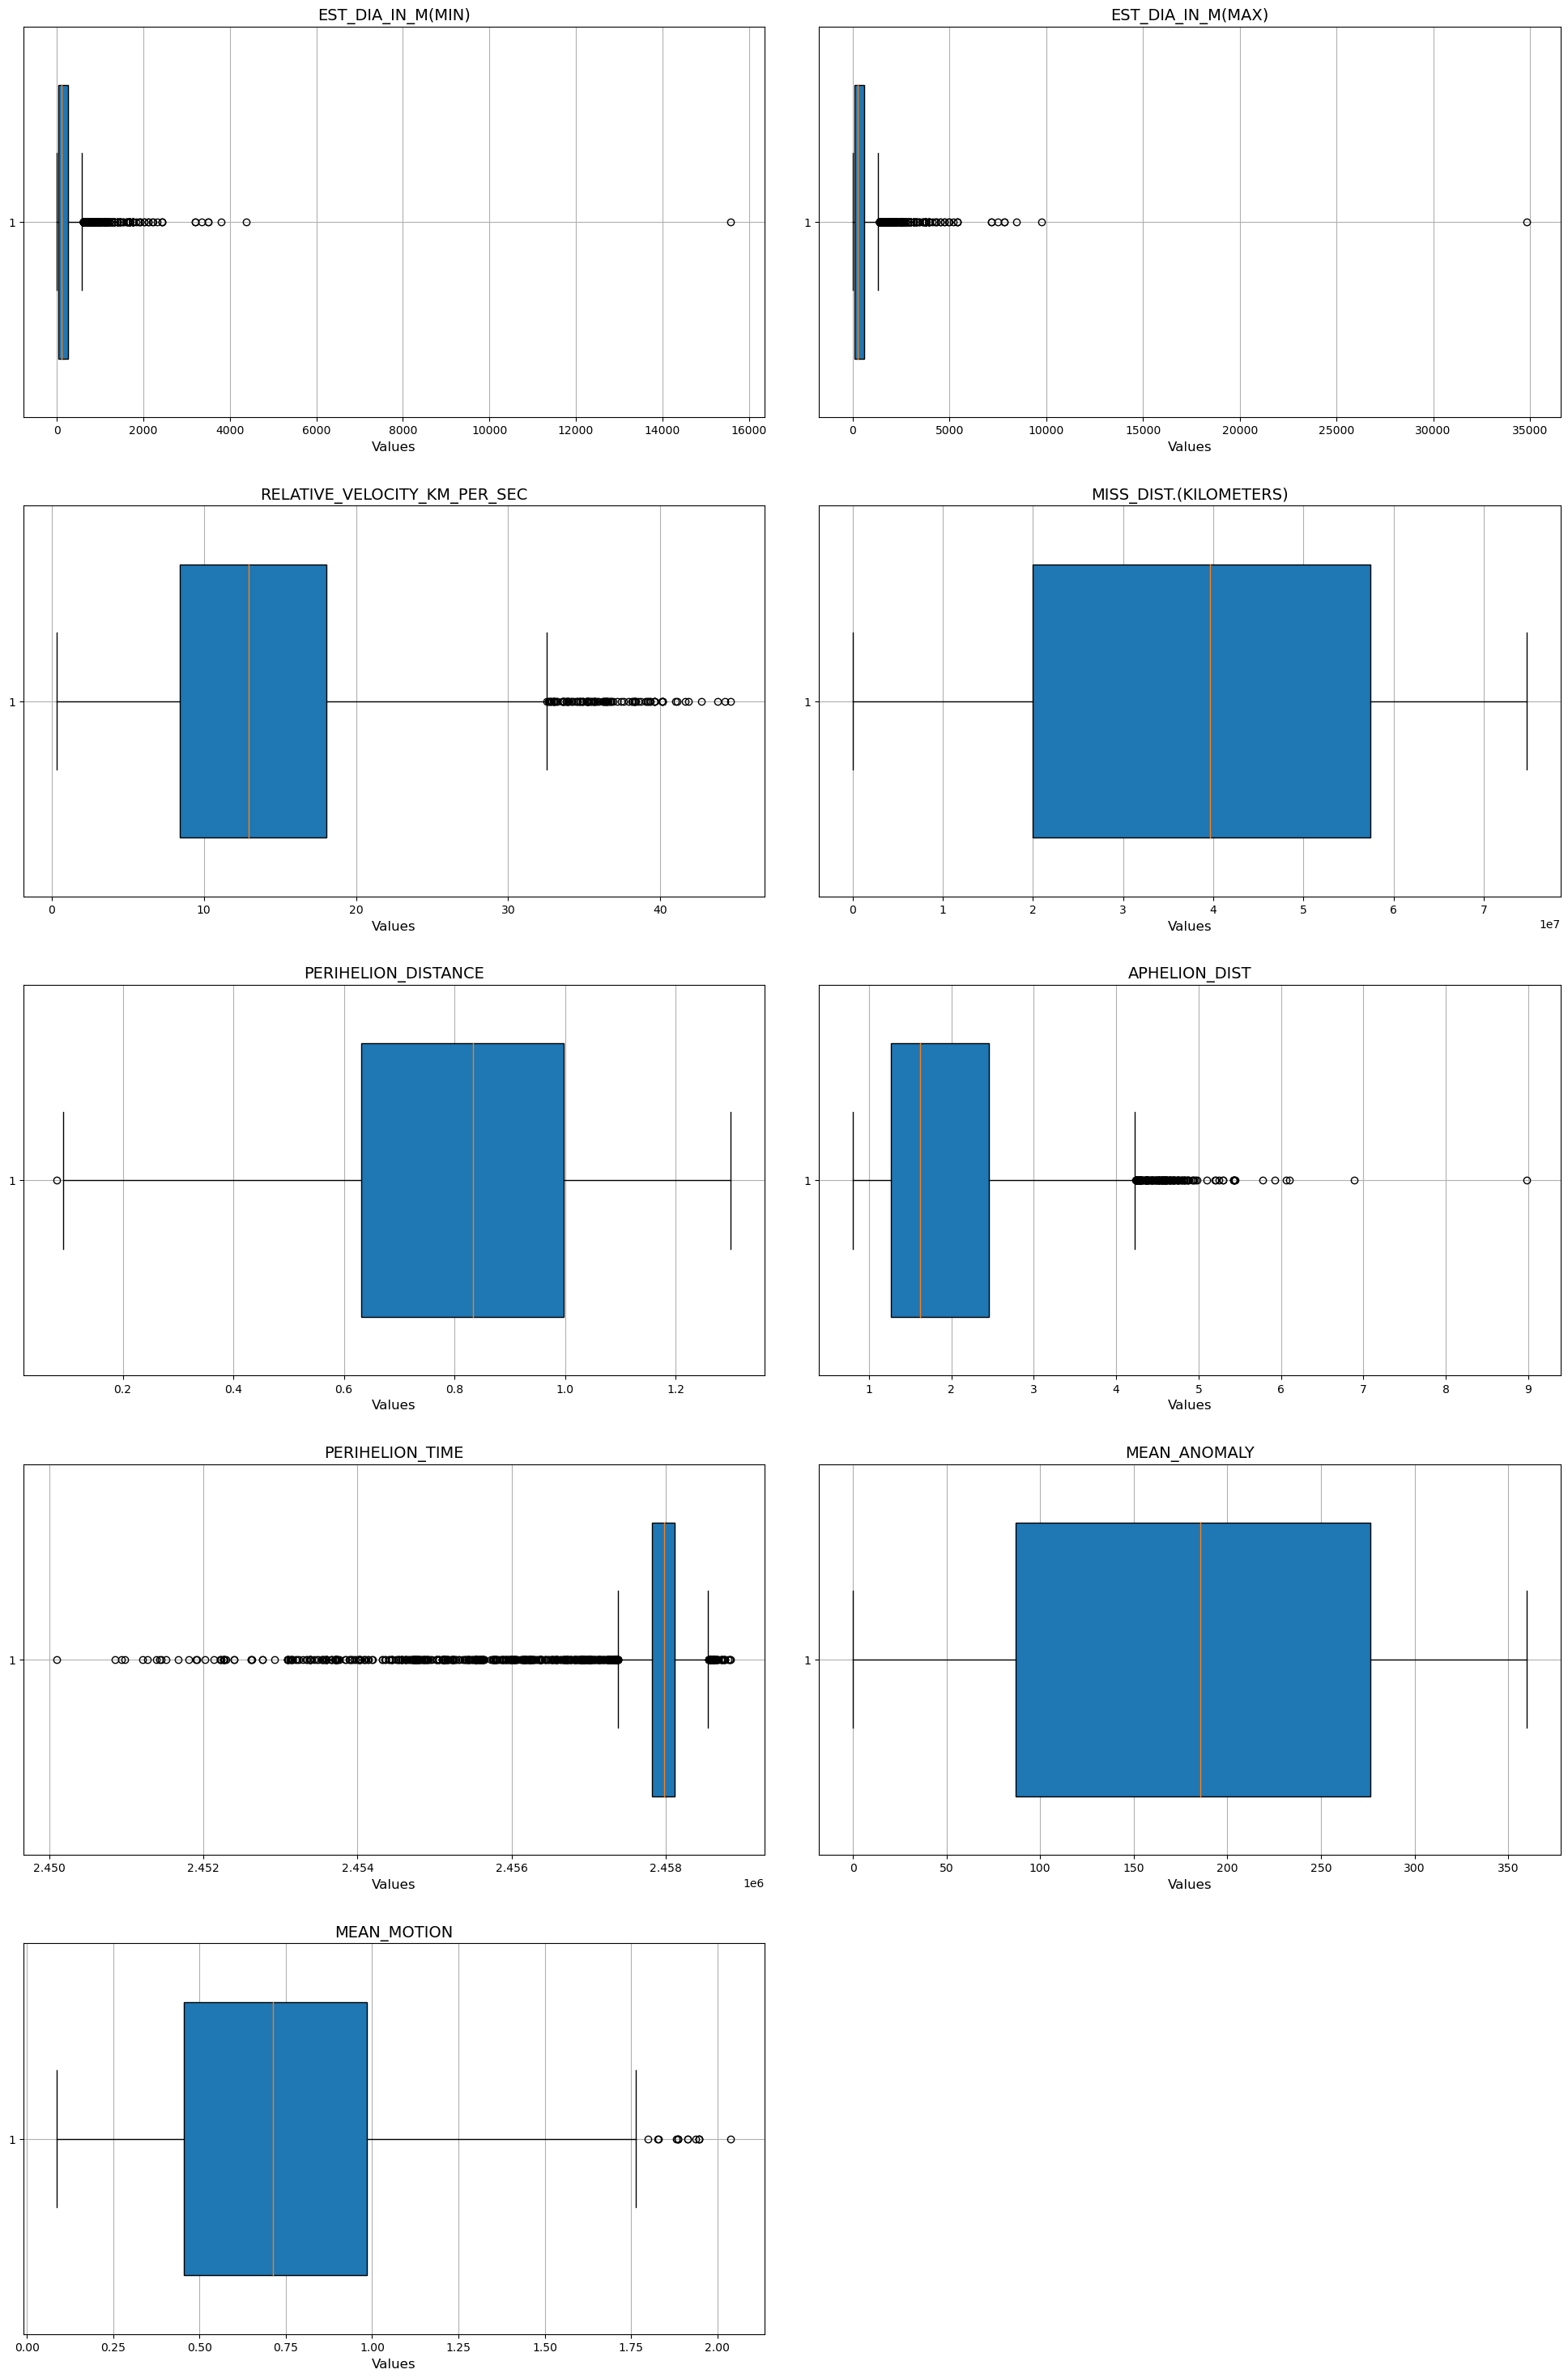

In [12]:
# Select numerical variables for outlier analysis
numerical_vars = [
    "EST_DIA_IN_M(MIN)",
    "EST_DIA_IN_M(MAX)",
    "RELATIVE_VELOCITY_KM_PER_SEC",
    "MISS_DIST.(KILOMETERS)",
    "PERIHELION_DISTANCE",
    "APHELION_DIST",
    "PERIHELION_TIME",
    "MEAN_ANOMALY",
    "MEAN_MOTION",
]

# Calculate the number of rows and columns for subplots
num_plots = len(numerical_vars)
num_cols = 2
num_rows = math.ceil(num_plots / num_cols)

# Create subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10*num_cols, 6*num_rows))

# Flatten the axs array if it's more than 1D
axs = axs.flatten() if isinstance(axs, np.ndarray) else [axs]

# Iterate through numerical variables and create box plots
for i, var in enumerate(numerical_vars):
    ax = axs[i]
    ax.boxplot(nasa_df[var], vert=False, patch_artist=True, widths=0.7)
    ax.set_title(var, fontsize=14)  # Increase title font size
    ax.set_xlabel('Values', fontsize=12)  # Label for x-axis
    ax.grid(True)

# Hide extra subplots if there are more than needed
for j in range(num_plots, len(axs)):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout(pad=3.0)  # Adjust spacing between each subplots
plt.show()


## Calculate outliers and drop outlier row

In [ ]:
# Identify and drop outliers
cleaned_nasa_df = nasa_df.copy()  # Create a copy of the original DataFrame
outlier_indices = []
for var in numerical_vars:
    q1 = nasa_df[var].quantile(0.25)
    q3 = nasa_df[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = nasa_df[((nasa_df[var] < lower_bound) | (nasa_df[var] > upper_bound))]
    outlier_indices.extend(outliers.index)

#print(outlier_indices)

# Remove duplicate indices and create a new DataFrame without outliers
cleaned_nasa_df = nasa_df.drop(index=set(outlier_indices))

# Reset the DataFrame index
cleaned_nasa_df.reset_index(drop=True, inplace=True)
cleaned_nasa_df

## Save the dataframe (without outliers) into a CSV file

In [ ]:
# Save the dataframe to a CSV file
cleaned_nasa_df.to_csv('./datasets/nasa_data_without_outliers.csv', index=False)

In [ ]:
# Standardizing Data
# Select numerical variables for standardization
numerical_vars = [
    "EST_DIA_IN_M(MIN)",
    "EST_DIA_IN_M(MAX)",
    "RELATIVE_VELOCITY_KM_PER_SEC",
    "MISS_DIST.(KILOMETERS)",
    "PERIHELION_DISTANCE",
    "APHELION_DIST",
    "PERIHELION_TIME",
    "MEAN_ANOMALY",
    "MEAN_MOTION",
]

# Create StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected variables
nasa_df_standardized = cleaned_nasa_df.copy()  # Make a copy to avoid modifying the original DataFrame
nasa_df_standardized[numerical_vars] = scaler.fit_transform(nasa_df_standardized[numerical_vars])

# Now mbti_df_standardized contains standardized numerical variables
nasa_df_standardized

## Plot data without the outliers

In [ ]:
df_exclude_outlier = nasa_df.copy()
# Select numerical variables for outlier analysis
numerical_vars = [
    "EST_DIA_IN_M(MIN)",
    "EST_DIA_IN_M(MAX)",
    "RELATIVE_VELOCITY_KM_PER_SEC",
    "MISS_DIST.(KILOMETERS)",
    "PERIHELION_DISTANCE",
    "APHELION_DIST",
    "PERIHELION_TIME",
    "MEAN_ANOMALY",
    "MEAN_MOTION",
]

# Calculate the number of rows and columns for subplots
num_plots = len(numerical_vars)
num_cols = 2
num_rows = math.ceil(num_plots / num_cols)

# Create subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10*num_cols, 6*num_rows))

# Flatten the axs array if it's more than 1D
axs = axs.flatten() if isinstance(axs, np.ndarray) else [axs]

# Iterate through numerical variables and create box plots
for i, var in enumerate(numerical_vars):
    ax = axs[i]
    # Set showfliers=False to exclude outliers from whiskers
    ax.boxplot(df_exclude_outlier[var], vert=False, patch_artist=True, widths=0.7, showfliers=False)  
    ax.set_title(var, fontsize=14)  # Increase title font size
    ax.set_xlabel('Values', fontsize=12)  # Label for x-axis
    ax.grid(True)

# Hide extra subplots if there are more than needed
for j in range(num_plots, len(axs)):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout(pad=3.0)  # Adjust spacing between each subplot
plt.show()